# IML/PRSTIM project : NMR Signal & Peak Detection

Edwin Grappin & Guillaume Tochon

## Overall objective

This challenge works on nuclear magnetic resonance (NMR) observation to analyze leaves of plants. Studying leaves under RMN allows to understand the position of water within the cells.

Understanding the distribution of water in leaf cells is insightful to understand the level of senescence (the degradation due to the age) of the leaves.
Indeed, in advanced stage of senescence, the amount of water in the vacuoles increases. Measuring the level of senescence is useful to assess the impact of environmental factors on the plant. In particular, in R&D, some scientists think about using NMR to compare the efficacy of treatments (products that are applied to the plants to protect the plants from different stresses such as drought, heat, disease...).

In this settings processing NMR signals to assess the stage of senescence of plants could be used to discover new plants treatments.

## Data description

Data are composed of leaf spectra (non-normalized densities) of T2 relaxation time (go read again your IMED course if you don't remember what is a T2 relaxation time), such as the one displayed below. The x-axis represents time (in ms) while the y-axis represent the intensity.

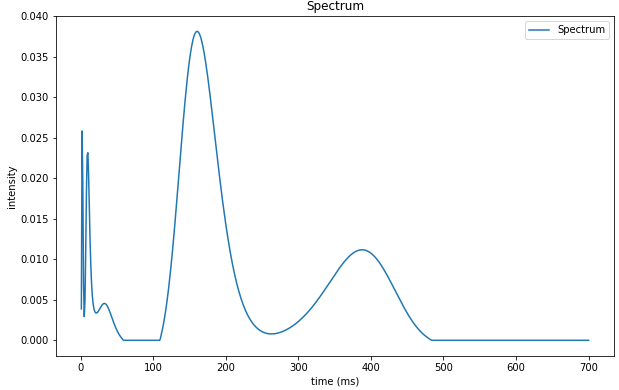

The spectrum is composed of peaks of various intensities and widths, and occuring at different relaxation times. Positions and intensities of the peaks correlate with the leaf age: the older the leaf, the higher the peak intensity and the later the relaxation time. 

Leaves are labeled by rank depending on their age on the plant.

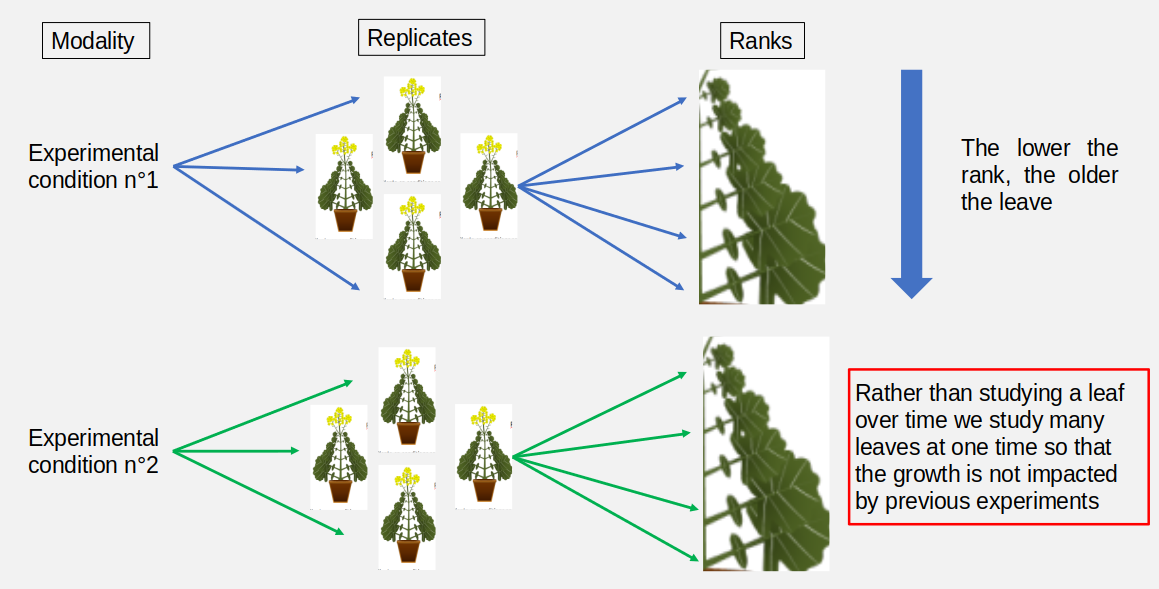


The higher the rank, the younger the leaf. In the figure below for instance, one can see the NMR response of a leaf getting older (from rank 6 to rank 3). At rank 6, there is a single peak with high intensity. Then, the T2 relaxation time of this peak is increasing in rank 5. In rank 4, the peak starts to split in two. At rank 3, the split is very clear. 

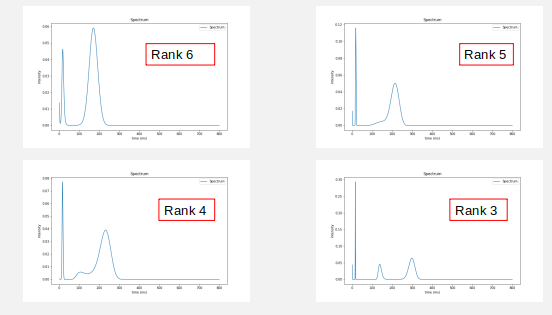


Information related to the number and the position of peaks in a given spectrum, as well as their intensity and width, are important information to caracterize the way a plant (and its leaves) react to environmental conditions and stress. 

## Goal of the project
The goal of this project is two-fold. First, detecting and classifying the type of peaks in the NMR spectra. Second, predicting their position. 
For that matter, you will have the opportunity to use different machine learning and data mining methods.

Inputs are organized as pj2 files (you can open them with python as any text files) describing the spectrum (with first column being the abscisse and the second column being the intensity of the signal). 

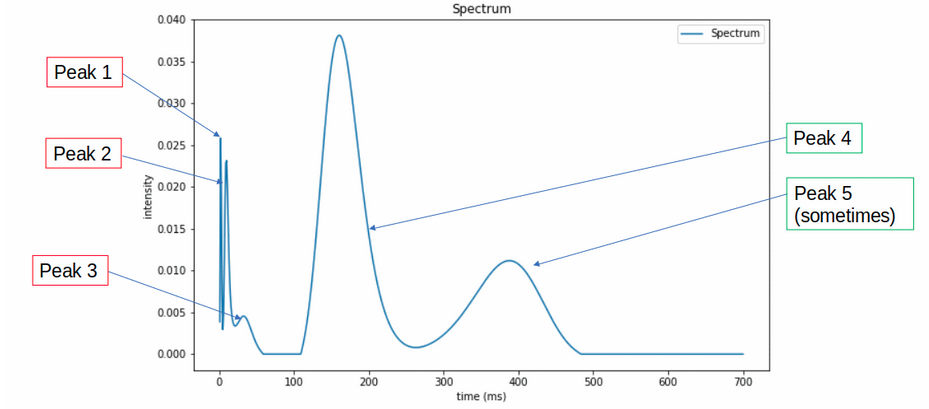

We are interested in the caracterization of 5 classes of peaks: 1, 2, 3, 4 and 5. 
Not all classes of peaks exist in every observation. The only structural link between peaks is that peak 5 exists only if peak 4 exists.

In order to train an estimator of peaks classes and the detection, you have access to 420 NMR signals and their associated peaks in the file data_nmr_input_epita_train.csv. A row is an observation, each column is the position in ms of the peak (if it exists). Therefore, your goal is to predict on each NMR observation which peak exist and then, provided it exists, to predict its position (in ms).

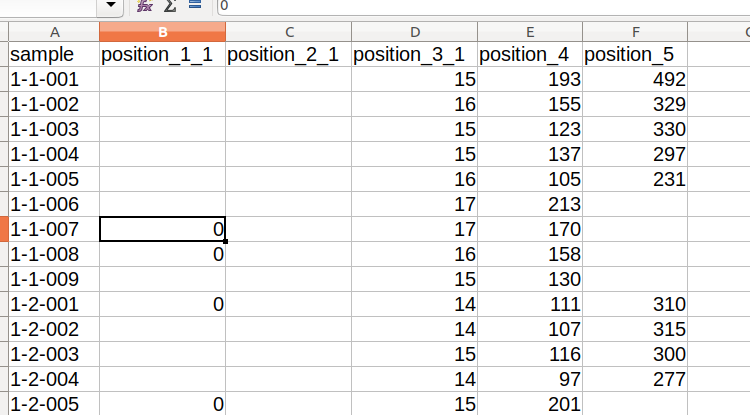

Data are organized in modality, replicate (observation) and rank. The file 7-3-001.pj2 is the NMR signal of the first rank of the 3 replicate of the modality 7. You have to extract and store the .zip file in the folder /app/Data/NMRBlue/LearningDataSet.

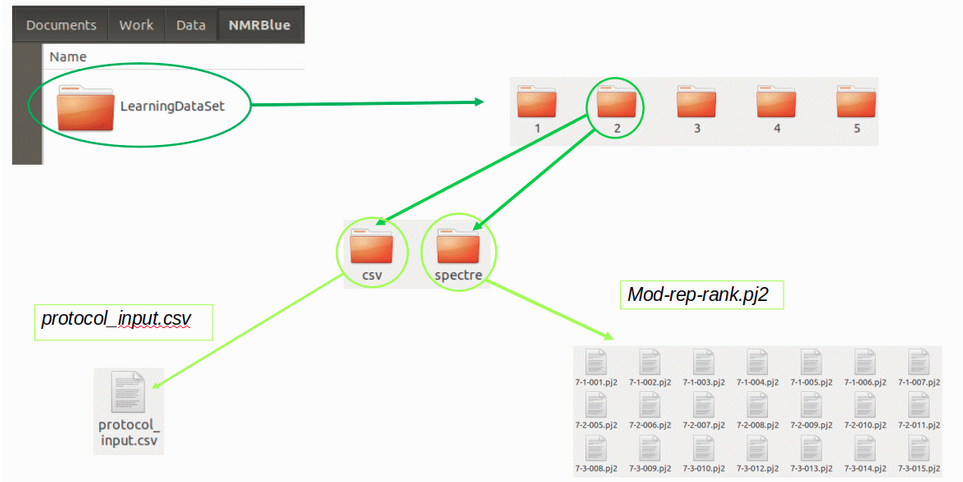

## Project organization 

Your output will be a jupyter lab notebook. The code should run (when docker container is ran) in this single jupyter notebook (but you can use other file that you import). Feel free to use markdown to explain and answer questions. Do not change container configuration. If extra installation is needed, please install directly in the notebook with `!pip install ...`. Your notebook should be self sufficient (within the docker container). 

You'll commit your results in your own branch called output/login1_login2<_login3> where _login1_ and _login2_ are your 2 EPITA logins (or 3 if you are three in the group). You will be working by groups of 2 for this project if you decide to commit your report by the end of August or by end of July if you decide to work in a group of 3.

The evaluation will be based on your ability to show that you understand machine learning concepts (such as clustering, classification) and notions related to statistics and probabilities. Good prediction performance will be valued as well, but a smart understanding of the topics and good choice of data processing and algorithms are what we are looking for. 

Due date: Last minute of July 2020 if you are a group of 3 or the last minute of August 2020 if you are a group of 2. 

The first sections (Parts 1, 2, 3 and 4) are mandatory. The "optional" section is... optional. 

## Part 1: understanding the data

In [1]:
#PATH_TO_DATA = '/app/Data/NMRBlue/LearningDataSet/'
PATH_TO_DATA = 'LearningDataSet/'

**I.1)** Create a function that takes as argument a modality number, a replicate number and that plot a serie of spectrum. Plot the spectrum in the notebook. What can you say about the data. What are the range of values ? are the spectrums densities ? Why, why not ? Are the data in one replicate independent from each other ? 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def load_all_spectrums():
    path = PATH_TO_DATA + '[0-9]*/spectre/*.pj2'
    files = glob.glob(path)
    files.sort()
    spectrums = {}
    for s in files:
        name = s.split('/')[-1].split('.')[0].split('-')
        mod = name[0]
        rep = name[1]
        rank = name[2]
        label = str(mod) + '-' + str(rep) + '-' + str(rank)
        spectrums[label] = np.transpose(np.loadtxt(s, delimiter=" ", skiprows=1))
    return spectrums

SPECTRUMS = load_all_spectrums()

def get_spectrum(mod, rep, number=None):
    label = str(mod) + '-' + str(rep)
    if not number:
        spcs = []
        for key, value in SPECTRUMS.items():
            if key.startswith(label):
                spcs.append(value)
        return spcs
    else:
        return SPECTRUMS[label + '-' + str(number).zfill(3)]

In [3]:
eg = get_spectrum(1, 1)
def plot_spectrums(spectrums):
    fig, axes = plt.subplots(len(spectrums) // 2 + (len(spectrums) % 2), 2, figsize=(25, 50), sharey=True)
    ax = axes.ravel()
    for ii in range(len(spectrums)):
        ax[ii].set_xlim((-10, 1100)) # We limit to 1100 because the data is usually incomplete beyond this bound
        ax[ii].plot(spectrums[ii][0], spectrums[ii][1], label='Rank' + str(ii + 1))
        ax[ii].legend()

plot_spectrums(eg)

Answers:

* On the abcisses,the values range between 0 and 2000 ms, however most of the spectrums cut of before (at 800 for most of them). The intenisities are small values that range between 0 and 0.1, it varies.
* The spectrums aren't densities (proof bellow)
* The data within a replicate seems to be independant.

The spectrum is not a density as the current area under the spectrum is equal to 3.5444599679207363 != 1


Text(0.5, 1.0, 'not normalized')

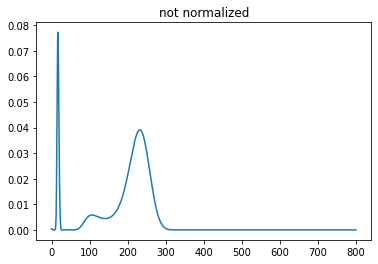

In [4]:
density_under_curve = np.trapz(eg[4][1], x = eg[4][0])
print('The spectrum is not a density as the current area under the spectrum is equal to', density_under_curve, '!= 1')
plt.plot(eg[4][0], eg[4][1])
plt.title('not normalized')

**I.2)** Create a normalization function to turn all spectra into density probability functions.

The spectrum is a density as the current area under the spectrum is equal to 1.0 == 1


Text(0.5, 1.0, 'normalized')

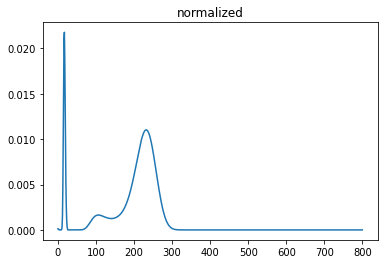

In [5]:
def normalize_spectrum(s):
    s[1] = s[1] / np.trapz(s[1], x = s[0])
        
normalize_spectrum(eg[4])
density_under_curve = np.trapz(eg[4][1], x = eg[4][0])
print('The spectrum is a density as the current area under the spectrum is equal to', density_under_curve, '== 1')
plt.plot(eg[4][0], eg[4][1])
plt.title('normalized')

In [6]:
def normalize_all_spectrums():
    for val in SPECTRUMS.values():
        normalize_spectrum(val)
normalize_all_spectrums()

## Part 2: Clustering approach and sampling to estimate the number of peaks.

The goal of this section is to try and differentiate the rank of the various spectra you have at hand with clustering approaches. The main issue comes from the fact that it is merely impossible to classify high dimensional data (that is, if you consider each spectrum as a vector whose dimension is the number of samples in the spectrum) without any prior dimension reduction method. So, let's try another approach, whose overall idea is the following : instead of clustering the spectra on their own, you are going to generate random variables out of those spectra (after proper normalization to turn the spectrum into a probability density function), and it is this bunch of random variables that you are going to cluster instead.

**II.1)** generate some scalar random variables from a given normalized spectrum.


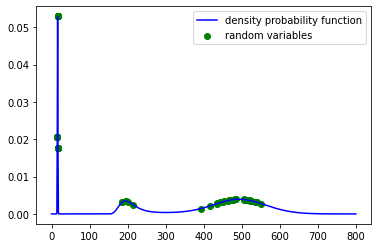

In [7]:
from scipy.signal import find_peaks

def spectral_sampling(spectre, samples_nb=1000):
    index_samples =  np.random.choice(spectre.shape[1], samples_nb, p=(spectre[1])**3 / np.sum(spectre[1] ** 3))
    X_samples = spectre[0, index_samples]
    Y_samples = spectre[1, index_samples]
    return X_samples, Y_samples

idx = 0
samples_nb = 1000

ex = eg[idx]
X_samples, Y_samples = spectral_sampling(ex, samples_nb)

plt.plot(ex[0], ex[1], label='density probability function', c='b')
plt.scatter(X_samples, Y_samples, c='g', label='random variables')
plt.legend()

**II.2)** for each NMR observation run a clustering algorithm to generate up to five clusters.

In [8]:
from sklearn.cluster import KMeans, MeanShift

def run_clustering(X_samples, nb_cluster=10):
    clustering = KMeans(nb_cluster)
    X_samples = X_samples.reshape((X_samples.shape[0], 1))
    clustering.fit(X_samples)
    pred = clustering.predict(X_samples)
    return clustering, pred


# -- Example -------------------

clustering, predictions = run_clustering(X_samples, 50)
pred = clustering.predict(X_samples[5].reshape((1, 1)))

plt.plot(ex[0], ex[1], label='density probability function', c='b')
for ii,c in enumerate(clustering.cluster_centers_):
    plt.axvline(c)
plt.scatter(X_samples, Y_samples, c=predictions)
plt.legend()

<ipython-input-8-7346b3a9ce4f>:6: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (50). Possibly due to duplicate points in X.
  clustering.fit(X_samples)


**II.3)** Estimate the number of peaks. Create an evaluation rule to decide what is the best number of clusters to use (considering that you know the number of peaks thanks to the CSV) in order to minimize the sum of absolute difference between the estimated number of peaks and the ground truth number of peaks in an NMR observation.

To estimate the number of peaks we use the derivative of the spectrum. With it, we can find local minimums and thus find the number of possible peaks.

In [9]:
# Estimation of number of peaks

def compute_derivative(spectrum):
    return np.diff(spectrum[1]) / np.diff(spectrum[0])

def find_local_minimums(spectrum, derivative):
    local_minimums = []
    for i in range(1, len(derivative)):
 
        if derivative[i - 1] < 0 and spectrum[1][i - 1] > 0.0006:
            nb_zeros = 0
            tmp_i = i
            while(i < len(derivative) - 1 and (derivative[i] == 0 or spectrum[1][i] <= 0.0006)):
                i += 1
                nb_zeros += 1
            if derivative[i] > 0:
                local_minimums.append(spectrum[0,tmp_i + nb_zeros // 2])
    return local_minimums


# -- Example -------------------

d = compute_derivative(ex)
local_minimums = find_local_minimums(ex, d)

plt.plot(ex[0][:-1], d, label='derivative', c='b')
plt.plot(ex[0][:-1], ex[1][:-1], label='func', c='r')
for ii,c in enumerate(local_minimums):
    plt.axvline(c, c='g', label='local minima')
plt.legend()

print("The estimated number of peaks is :", len(local_minimums) + 1)

The estimated number of peaks is : 3


In [21]:
import pandas as pd

gt_peaks = pd.read_csv(PATH_TO_DATA + "data_nmr_input_epita_train.csv"

sample  position_1_1  position_2_1  position_3_1  position_4  \
0     1-1-001           NaN           NaN          15.0       193.0   
1     1-1-002           NaN           NaN          16.0       155.0   
2     1-1-003           NaN           NaN          15.0       123.0   
3     1-1-004           NaN           NaN          15.0       137.0   
4     1-1-005           NaN           NaN          16.0       105.0   
..        ...           ...           ...           ...         ...   
415  12-4-006           NaN           8.0           NaN       136.0   
416  12-4-007           0.0           6.0          12.0        96.0   
417  12-4-008           0.0           NaN          14.0       166.0   
418  12-4-009           NaN           6.0           NaN       161.0   
419  12-4-010           0.0           8.0          46.0       169.0   

     position_5  
0         492.0  
1         329.0  
2         330.0  
3         297.0  
4         231.0  
..          ...  
415         NaN  
416       202.0  
417         NaN  
418         NaN  
419         NaN  

[420 rows x 6 columns]

In [11]:
import math

def evaluate_number_of_peaks(gt_peaks):
    nb_found = 0
    nb_gt = 0
    total_diff = []

    for spc in gt_peaks.iterrows():
        label = spc[1]["sample"].split("-")
        
        try:
            spectrum = get_spectrum(int(label[0]), int(label[1]), label[2])
        except:
            continue
        gt_n_peaks = 0
        gt_n_peaks += 1 if not math.isnan(spc[1]["position_1_1"]) else 0
        gt_n_peaks += 1 if not math.isnan(spc[1]["position_2_1"]) else 0
        gt_n_peaks += 1 if not math.isnan(spc[1]["position_3_1"]) else 0
        gt_n_peaks += 1 if not math.isnan(spc[1]["position_4"])   else 0
        gt_n_peaks += 1 if not math.isnan(spc[1]["position_5"])   else 0
        
        d = compute_derivative(spectrum)
        local_min = find_local_minimums(spectrum, d)
        
        if abs(gt_n_peaks - (len(local_min) + 1)) == 3:
               print(label)
        total_diff.append(abs(gt_n_peaks - (len(local_min) + 1)))

        nb_found += len(local_min) + 1
        nb_gt  += gt_n_peaks
    return total_diff, nb_found, nb_gt
        
diff, tot, totgt = evaluate_number_of_peaks(gt_peaks)
        
np.asarray(diff).mean(), tot, totgt, tot / totgt - 1

['10', '1', '005']
['10', '2', '005']
['10', '2', '008']
['10', '4', '011']


(0.47381546134663344, 1459, 1333, 0.09452363090772686)

**II.extra)** Using a clustering algorithm allows us to correctly approximate the position of most peaks of a spectrum. However, we identified a case quite common in our dataset where it is unable to do so. This happens when two peaks are very close to each other and one of them has a much greater height. To deal with this problem we opted for a system that where we train multiple clusters and user the derived to better approximate the peak position.

<ipython-input-8-7346b3a9ce4f>:6: ConvergenceWarning: Number of distinct clusters (45) found smaller than n_clusters (50). Possibly due to duplicate points in X.
  clustering.fit(X_samples)


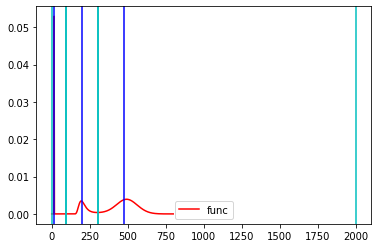

In [12]:
LIMIT_SPECTRUM_SUP = 2000
LIMIT_SPECTRUM_INF = -1

def many_cluster(spectre):
    X_samples, Y_samples = spectral_sampling(spectre, samples_nb=1000)

    d = compute_derivative(spectre)
    local_min = find_local_minimums(spectre, d)

    clustering, predictions = run_clustering(X_samples, 50)
    
    clusters_by_peak = []
    peaks = []
    local_bounds = []
    
    centers = clustering.cluster_centers_

    if centers[centers < local_min[0]].size != 0:
        peaks.append(centers[centers < local_min[0]].mean())
        clusters_by_peak.append(len(centers[centers < local_min[0]]))
        local_bounds.append((LIMIT_SPECTRUM_INF, local_min[0]))

    for i in range(1, len(local_min)):
        if (centers[np.logical_and(centers > local_min[i - 1], centers < local_min[i])].size != 0):
            peaks.append(centers[np.logical_and(centers > local_min[i - 1], centers < local_min[i])].mean())
            clusters_by_peak.append(len(centers[np.logical_and(centers > local_min[i - 1], centers < local_min[i])]))
            local_bounds.append((local_min[i - 1], local_min[i]))
        
    if centers[centers > local_min[-1]].size != 0:
        peaks.append(centers[centers > local_min[-1]].mean())
        local_bounds.append((local_min[-1], LIMIT_SPECTRUM_SUP))
        clusters_by_peak.append(len(centers[centers > local_min[-1]]))

    return peaks, local_bounds, clusters_by_peak

peaks, local_bounds, clusters_by_peak = many_cluster(ex)
    
plt.plot(ex[0][:-1], ex[1][:-1], label='func', c='r')

for ii,c in enumerate(zip(peaks, local_bounds)):
    plt.axvline(c[0], c='b')
    plt.axvline(c[1][0], c='c')
    plt.axvline(c[1][1], c='c')  
plt.legend()

## Part 3: Classification

Let's assume for a moment that you know the number of peaks in each observation. (you can count them from the csv file). The goal of this section is to classify these peaks from type 1 to type 5. 

**III.1)** generate some features from the clusters you created in Part 2 to classify peaks in their type (1, 2, 3, 4, 5).

In [13]:
def generate_feature(peak, l, r, nb_clusters):
    feature_vector = np.zeros(shape=(1,4))
    feature_vector[0,0] = peak
    feature_vector[0,1] = l
    feature_vector[0,2] = r
    feature_vector[0,3] = nb_clusters
    return feature_vector

In [14]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def generate_features(gt_peaks):
    x_samples = []
    y_samples = []
    for spc in gt_peaks.iterrows():
        label = spc[1]["sample"].split("-")

        try:
            spectrum = get_spectrum(int(label[0]), int(label[1]), label[2])
        except:
            continue
            
        peaks, local_bounds, nb_clusters = many_cluster(spectrum)
        for ii, lb in enumerate(local_bounds):
            l, r = lb
            if not math.isnan(spc[1]["position_1_1"]) and spc[1]["position_1_1"] > l and spc[1]["position_1_1"] < r:
                x_samples.append(generate_feature(peaks[ii], l, r, nb_clusters[ii]))
                y_samples.append(1)
            if not math.isnan(spc[1]["position_2_1"]) and spc[1]["position_2_1"] > l and spc[1]["position_2_1"] < r:
                x_samples.append(generate_feature(peaks[ii], l, r, nb_clusters[ii]))
                y_samples.append(2)
            if not math.isnan(spc[1]["position_3_1"]) and spc[1]["position_3_1"] > l and spc[1]["position_3_1"] < r:
                x_samples.append(generate_feature(peaks[ii], l, r, nb_clusters[ii]))
                y_samples.append(3)
            if not math.isnan(spc[1]["position_4"]) and spc[1]["position_4"] > l and spc[1]["position_4"] < r:
                x_samples.append(generate_feature(peaks[ii], l, r, nb_clusters[ii]))
                y_samples.append(4)
            if not math.isnan(spc[1]["position_5"]) and spc[1]["position_5"] > l and spc[1]["position_5"] < r:
                x_samples.append(generate_feature(peaks[ii], l, r, nb_clusters[ii]))
                y_samples.append(5)
                
    return np.asarray(x_samples), np.asarray(y_samples)

X, Y = generate_features(gt_peaks)

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
X = X.reshape(X.shape[0], X.shape[-1])
Y = Y.reshape(-1)
X.shape, Y.shape

((1294, 4), (1294,))

**III.2)** What classification method would you use?

**III.3)** Run a classification method on each selected clusters and classify each peak you have identified. What is the accuracy of your method. Can you plot the confusion matrix ? 

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

classifier = MLPClassifier(200)
classifier.fit(X_train, Y_train)

classifier.score(X_test, Y_test)

0.833976833976834

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred, labels=[1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86        73
           2       0.62      0.55      0.58        33
           3       0.81      0.80      0.80        49
           4       0.93      0.92      0.93        76
           5       0.81      0.89      0.85        28

    accuracy                           0.83       259
   macro avg       0.80      0.81      0.80       259
weighted avg       0.83      0.83      0.83       259

[[64  8  1  0  0]
 [ 7 18  8  0  0]
 [ 5  3 39  2  0]
 [ 0  0  0 70  6]
 [ 0  0  0  3 25]]


**III.4)** Create an estimator of the position of a peak. 

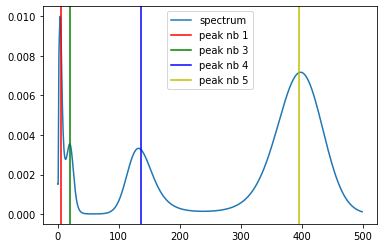

In [18]:
test = get_spectrum(6, 4, 2)

peaks, local_bounds, nb_clusters = many_cluster(test)
features = []
for i, peak in enumerate(peaks):
    features.append(generate_feature(peak, local_bounds[i][0], local_bounds[i][1], nb_clusters[i]))
features = np.asarray(features)
features = features.reshape(features.shape[0], features.shape[-1])
    
pred = classifier.predict(features)

plt.plot(test[0][:-1], test[1][:-1], label='spectrum')
colors = ['r', 'g', 'b', 'y', 'm']
for i,p in enumerate(pred):
    plt.axvline(peaks[i], label="peak nb " + str(p), c=colors[i])
plt.legend()

## Part 4 : Putting things together. 

Part 2 was about counting the number of peaks while Part 3 was about characterizing peaks types. The goal of this section is to generate a complete workflow that estimates the peak types and positions existing in a given NMR spectrum. We suggest that you use Parts 2 and 3 to do so, but this is in no way mandatory.

In order to score this section we will run your function on a dataset that you don't have access to. But you can train your estimator on the training dataset you have access to (the data we use for testing are quite similar).

Your function should take a list of modalities, scrap all the existing replicates in these modalities folders and return a csv in the same shape as the one in the training dataset. 

Four loss functions will be used to evaluate the quality of your estimator:
- The absolute difference between the number of detected peaks and the real number of peaks. 
- For each detected peaks the accuracy of its classification type. 
- For each detected peaks the square of the difference between the ground truth position and the estimated position. 

Your function should read a skeleton CSV of 6 columns: 
The first column will indicate the modality-replicate-rank to read for the prediction. Then your function should write in the CSV your estimation of peak 1 to 5 position. 
To help you, we created in advance the skeleton of the CSV. Then you should write your result in a new csv name "result.csv" stored in /app/Data/NMRBlue/LearningDataSet. 

It will be compared with the ground truth CSV with the following code:

In [34]:
@ignore_warnings(category=ConvergenceWarning)
def pipeline(pred_peak, classifier):

    # Prediction ----------------------------------
    out = pd.read_csv(pred_peak)
    for label in SPECTRUMS:
        spectrum = SPECTRUMS[label]

        peaks, local_bounds, nb_clusters = many_cluster(spectrum)
        
        features = []
        for i, peak in enumerate(peaks):
            features.append(generate_feature(peak, local_bounds[i][0], local_bounds[i][1], nb_clusters[i]))
        features = np.asarray(features)
        features = features.reshape(features.shape[0], features.shape[-1])

        pred = classifier.predict(features)

        for i, c in enumerate(pred):
            if c == 1:
                out.loc[out['position_1_1'] == label] =  peaks[i]
            if c == 2:
                out.loc[out['position_2_1'] == label] =  peaks[i]
            if c == 3:
                out.loc[out['position_3_1'] == label] =  peaks[i]
            if c == 4:
                out.loc[out['position_4'] == label]   =  peaks[i]
            if c == 5:
                out.loc[out['position_5'] == label]   =  peaks[i]

    out.to_csv(pred_peak)

pipeline("LearningDataSet/result.csv", classifier)

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/tarkof-ubuntu/.local/lib/p

In [35]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


pred_peak = pd.read_csv("/app/Data/NMRBlue/LearningDataSet/result.csv", index_col=0)
gt_peak = pd.read_csv("/app/Data/NMRBlue/LearningDataSet/gt.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/app/Data/NMRBlue/LearningDataSet/result.csv'

In [36]:
def counting_number_peak(df):
    res = df.count(axis=1, level=None, numeric_only=True)
    return res

def mae_count(gt, pred):
    count_gt = counting_number_peak(gt)
    count_pred = counting_number_peak(pred)
    mae = mean_absolute_error(count_gt, count_pred)
    return mae

In [37]:
# Score MAE
mae_count(gt_peak, pred_peak)

NameError: name 'gt_peak' is not defined

In [38]:
def flat(df):
    flatten = df.to_numpy().flatten()
    return flatten
def flat_boolean(df):
    flatten = flat(df)
    bool_flatten = ~np.isnan(flatten)
    return bool_flatten
    

In [39]:
boolean_gt = flat_boolean(gt_peak)
boolean_pred = flat_boolean(pred_peak)
accuracy_score(boolean_gt, boolean_pred)

NameError: name 'gt_peak' is not defined

In [40]:
flat_gt = flat(gt_peak)
flat_pred = flat(pred_peak)
not_nan_gt = ~np.isnan(flat_gt)
flat_gt = flat_gt[not_nan_gt]
flat_pred = flat_pred[not_nan_gt]

not_nan_pred = ~np.isnan(flat_pred)
flat_gt = flat_gt[not_nan_pred]
flat_pred = flat_pred[not_nan_pred]

sklearn.metrics.mean_squared_error(flat_gt, flat_pred)

NameError: name 'gt_peak' is not defined

## Optional part: Bayesian or Deep Learning peak detection
For those who want to, you could apply this if you want to dig bayesian stat:
https://www.researchgate.net/publication/258252347_Bayesian_Peak_Picking_for_NMR_Spectra
Or this if you want to dig CNN in NMR (adjustment to single dimension will be needed)
https://academic.oup.com/bioinformatics/article/34/15/2590/4934937
